In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
chromConvert = {
               'chr_05': 0, 
               'chr_5_p14_deletion': 1
               }

In [3]:
chromConvert_reverse = {
                0: 'chr_05',
                1: 'chr_5_p14_deletion'
               }

In [4]:
label = ['chr_05', 'chr_5_p14_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [5]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [6]:
for iterationNumber in range(7):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [7]:
y_predict_all[0].shape

(40, 2)

In [8]:
y_predict_all

[array([[1.0000000e+00, 6.9965148e-07],
        [7.0786780e-01, 3.3203268e-01],
        [9.9999869e-01, 4.1121788e-05],
        [9.9999356e-01, 9.9405872e-05],
        [1.0000000e+00, 2.0722155e-06],
        [9.9525225e-01, 1.4807526e-02],
        [9.9999988e-01, 3.8294666e-06],
        [9.9997962e-01, 4.7025684e-04],
        [9.9548727e-01, 4.4729412e-02],
        [1.0000000e+00, 2.5075323e-07],
        [9.9998856e-01, 4.7930109e-05],
        [9.9999940e-01, 4.4749173e-05],
        [1.0000000e+00, 9.3860700e-07],
        [9.9999976e-01, 1.1835980e-05],
        [9.9992967e-01, 6.9684733e-04],
        [1.0000000e+00, 1.0590940e-06],
        [9.9999976e-01, 6.6987886e-06],
        [9.9999702e-01, 8.1211067e-05],
        [9.9097365e-01, 1.5582975e-02],
        [9.9999130e-01, 3.7619023e-04],
        [1.0000000e+00, 4.9192386e-07],
        [1.0000000e+00, 2.6464215e-06],
        [9.9999821e-01, 8.0025784e-05],
        [9.9999952e-01, 2.7157914e-05],
        [9.9999845e-01, 9.1391797e-05],


In [9]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [10]:
for i in range(7):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [11]:
y_predict_all[0].shape

(40, 2)

In [12]:
label_convert

['chr_05', 'chr_5_p14_deletion']

In [13]:
len(y_test_concatenate_list)

277

In [14]:
len(y_predict_filtered_concatenate_list)

277

In [15]:
len(y_predict_concatenate_list)

277

# Classification Report

## Accuracy

In [16]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.9097472924187726


## Precision, Recall, and F1

In [17]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, 
                                          target_names=label_convert)


print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.94      0.93      0.94       201
chr_5_p14_deletion       0.82      0.86      0.84        76

         micro avg       0.91      0.91      0.91       277
         macro avg       0.88      0.89      0.89       277
      weighted avg       0.91      0.91      0.91       277



## Confusion Matrix

In [18]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN.csv')
confusion

,chr_05,chr_5_p14_deletion
chr_05,187,14
chr_5_p14_deletion,11,65


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [19]:
subtotal = [0] * 2  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [20]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [21]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,chr_05,chr_5_p14_deletion
chr_05,0.930348,0.069652
chr_5_p14_deletion,0.144737,0.855263


### 3.10.6 Precision (查准率）

In [22]:
subtotal_predict = [0] * 2 
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [23]:
cm_p = []
for i in range(2):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [24]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,chr_05,chr_5_p14_deletion
chr_05,0.944444,0.055556
chr_5_p14_deletion,0.177215,0.822785


#### Heat Map: Number

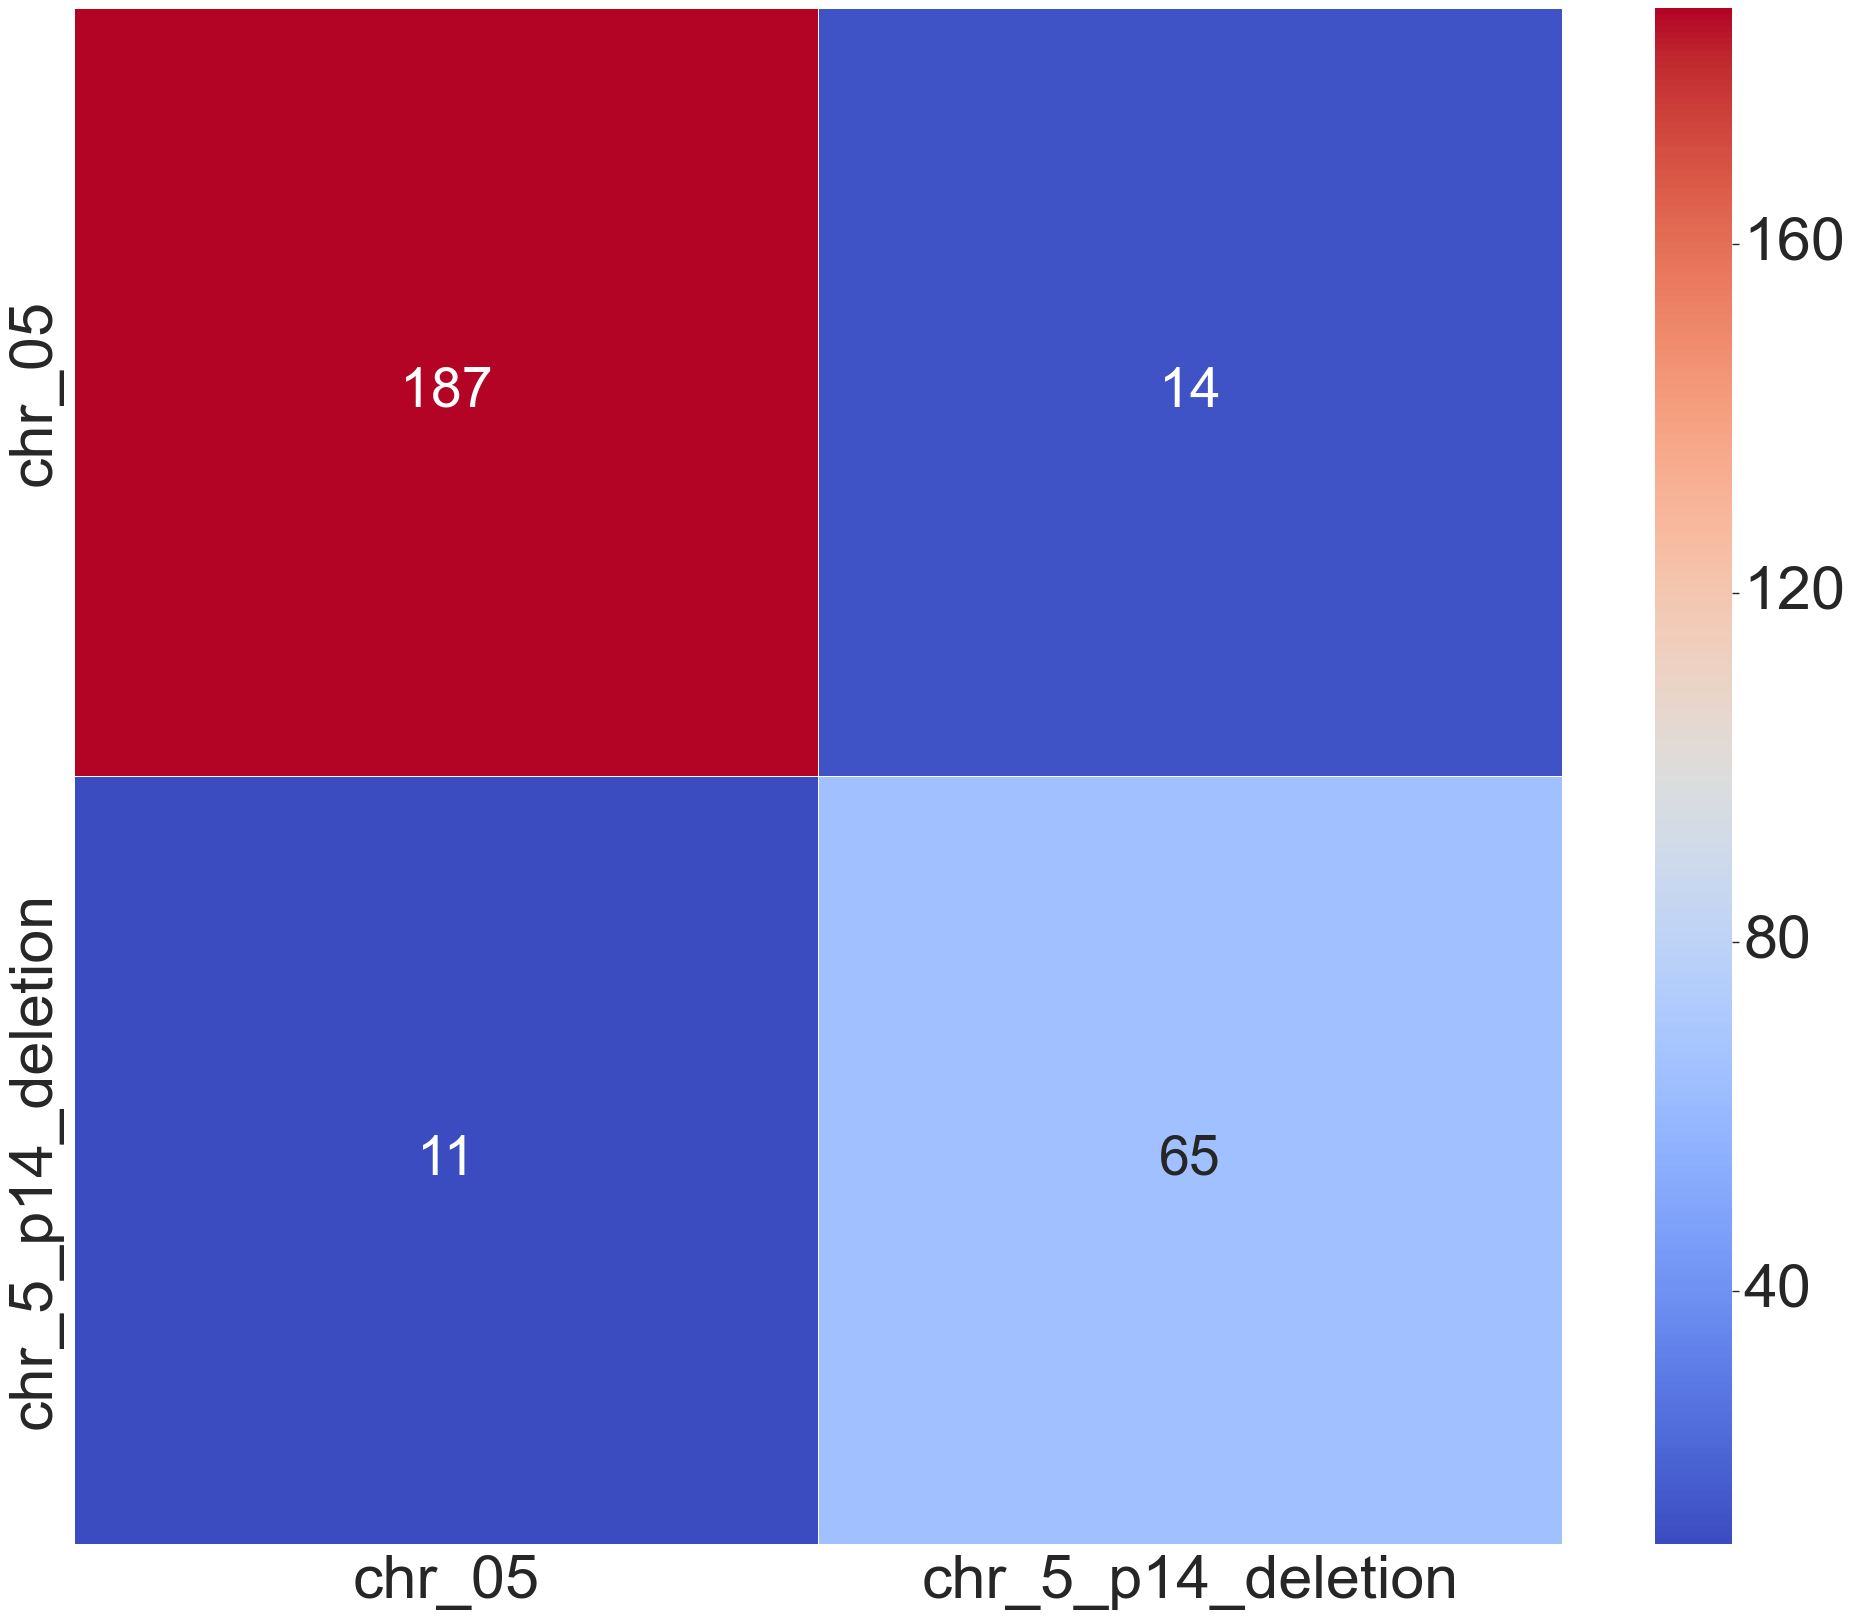

In [48]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  fmt='g',# It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

#### Heat Map of Recall: Rate (important!!!)

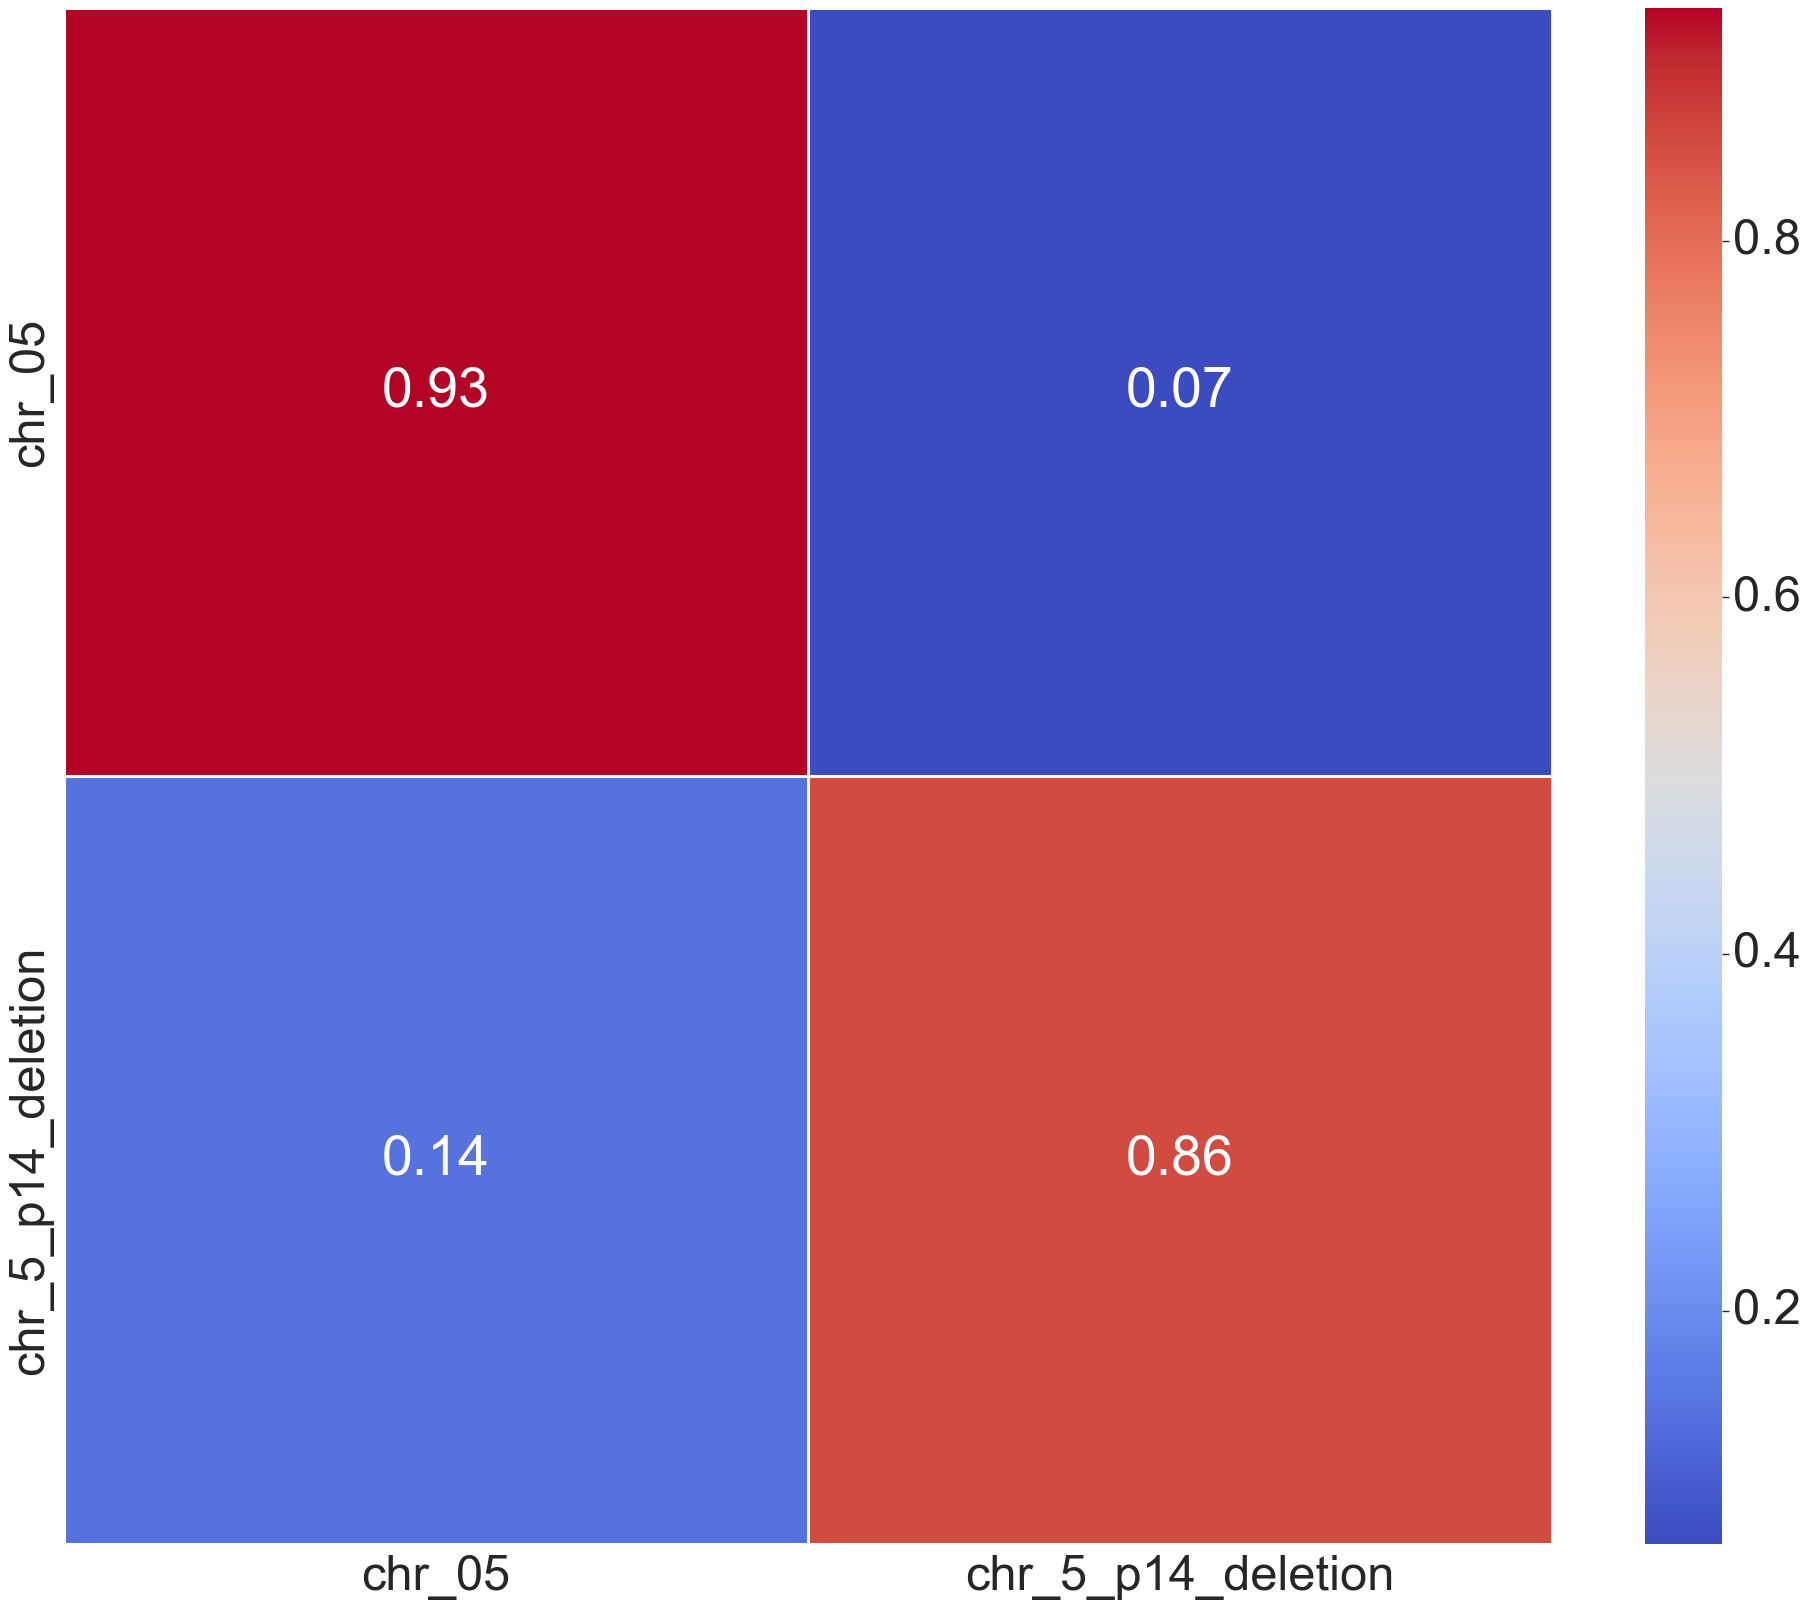

In [49]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

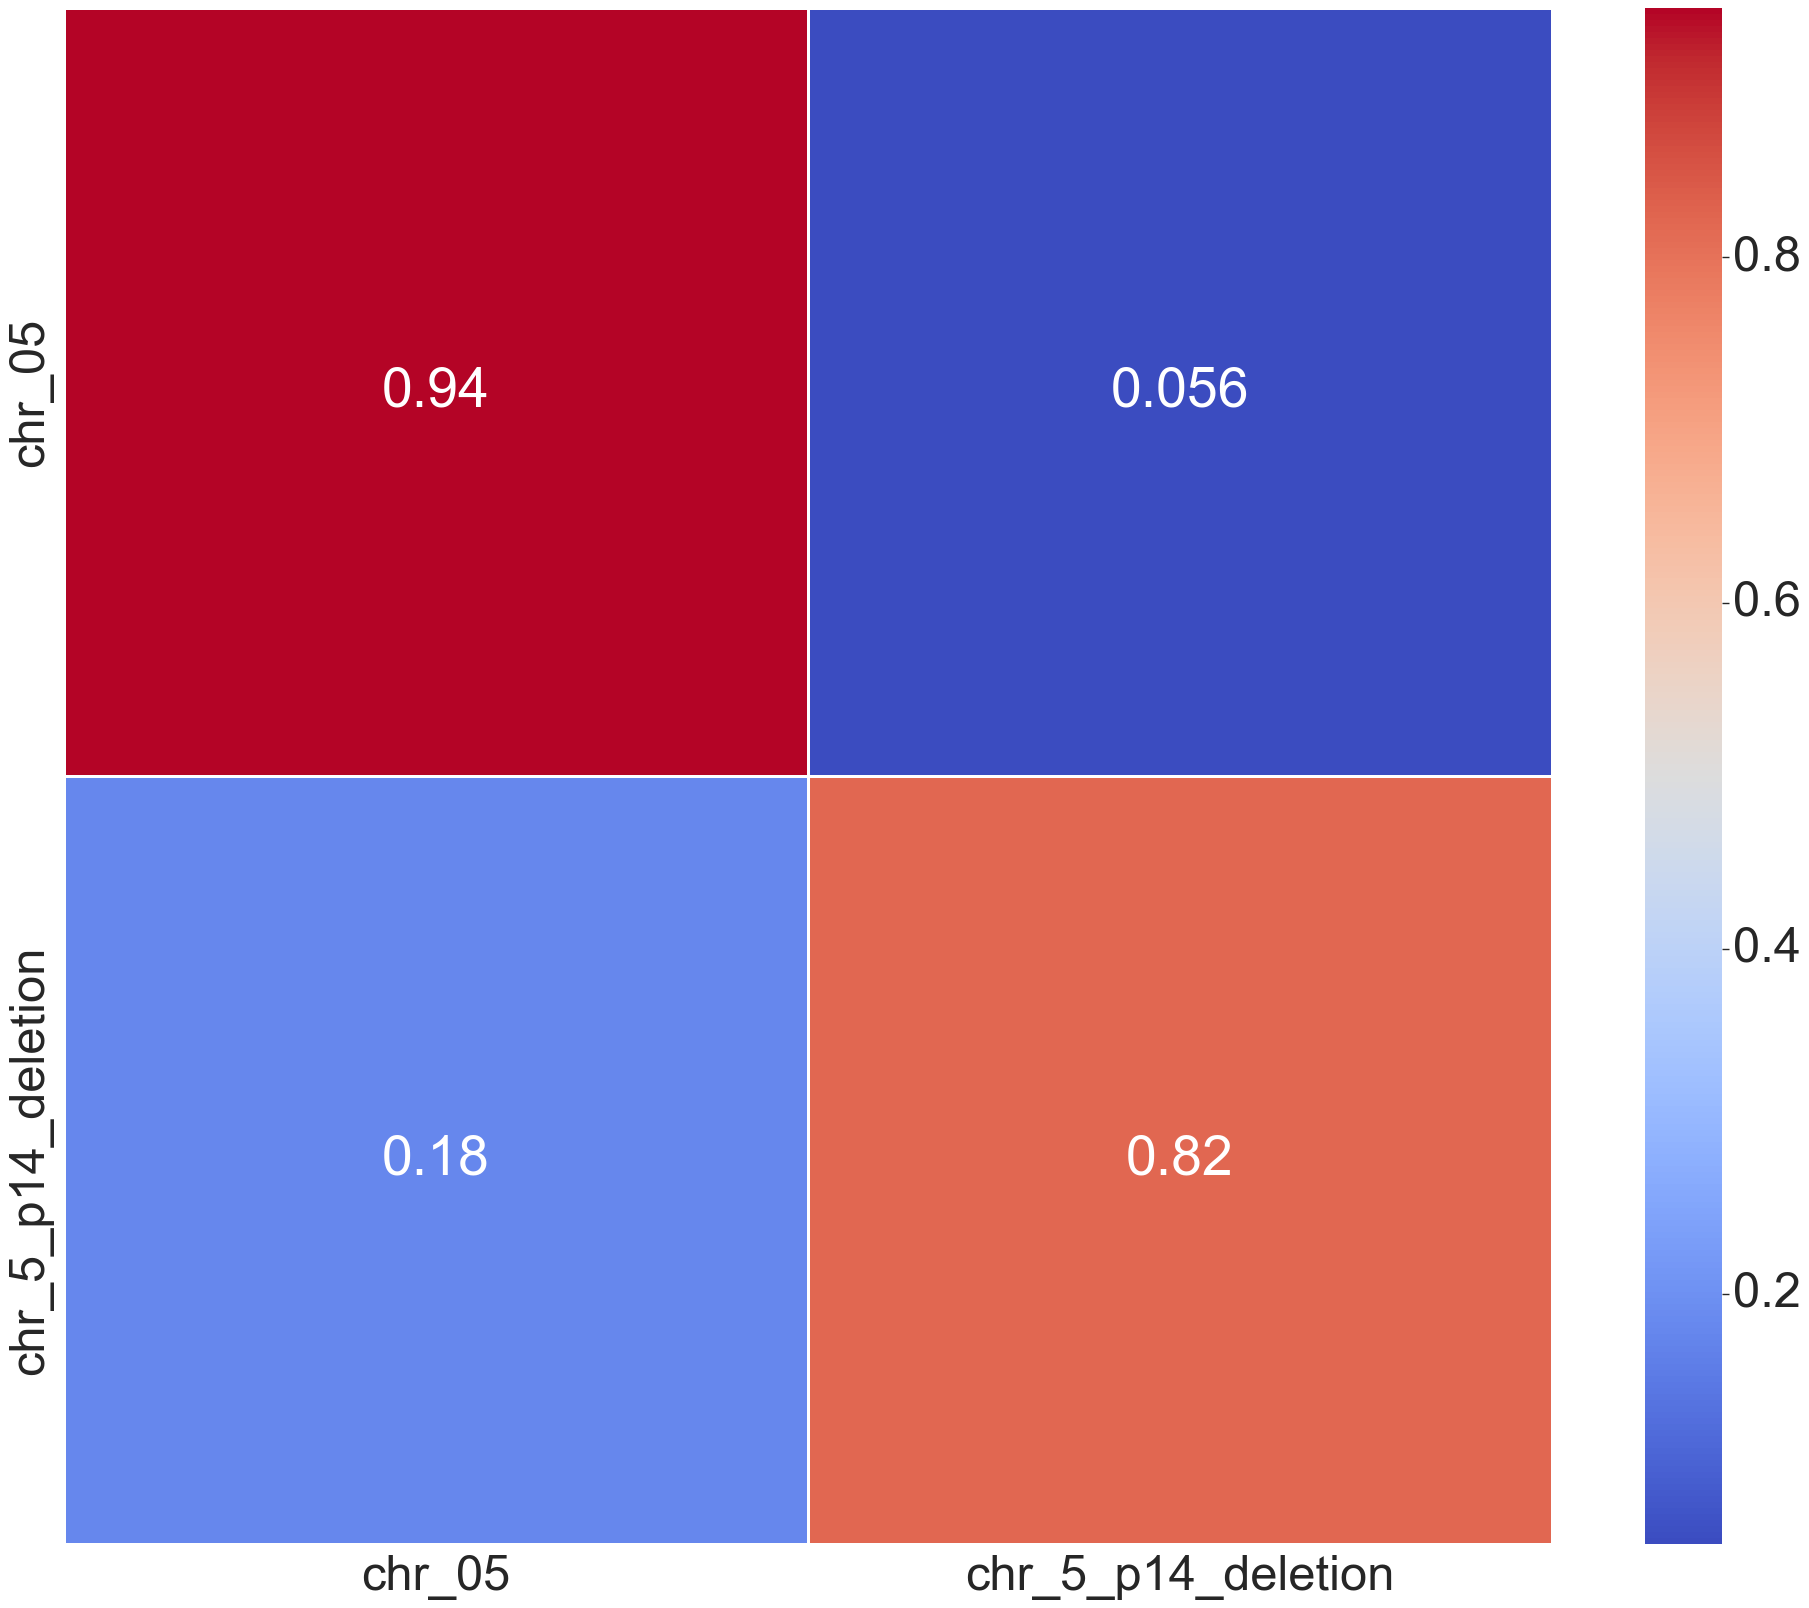

In [50]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

In [51]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [52]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [53]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)

# ROC Curve

In [54]:
y_predict_concatenate_array = np.array(y_predict_concatenate_list)
y_predict_concatenate_array

array([[1.00000000e+00, 6.99651480e-07],
       [7.07867801e-01, 3.32032681e-01],
       [9.99998689e-01, 4.11217879e-05],
       [9.99993563e-01, 9.94058719e-05],
       [1.00000000e+00, 2.07221547e-06],
       [9.95252252e-01, 1.48075260e-02],
       [9.99999881e-01, 3.82946655e-06],
       [9.99979615e-01, 4.70256840e-04],
       [9.95487273e-01, 4.47294116e-02],
       [1.00000000e+00, 2.50753232e-07],
       [9.99988556e-01, 4.79301088e-05],
       [9.99999404e-01, 4.47491730e-05],
       [1.00000000e+00, 9.38607002e-07],
       [9.99999762e-01, 1.18359803e-05],
       [9.99929667e-01, 6.96847332e-04],
       [1.00000000e+00, 1.05909396e-06],
       [9.99999762e-01, 6.69878864e-06],
       [9.99997020e-01, 8.12110666e-05],
       [9.90973651e-01, 1.55829750e-02],
       [9.99991298e-01, 3.76190234e-04],
       [1.00000000e+00, 4.91923856e-07],
       [1.00000000e+00, 2.64642154e-06],
       [9.99998212e-01, 8.00257840e-05],
       [9.99999523e-01, 2.71579138e-05],
       [9.999984

In [55]:
y_predict_concatenate_array.shape

(277, 2)

In [56]:
y_predict_1D = y_predict_concatenate_array[:,0]

In [34]:
y_predict_1D_processed = 1- y_predict_1D

In [35]:
fpr , tpr , thresholds = roc_curve(y_test_concatenate_list , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [36]:
auc_rf

0.9446517412935324

In [37]:
x = y = np.arange(0, 1.1, 0.1)

In [38]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

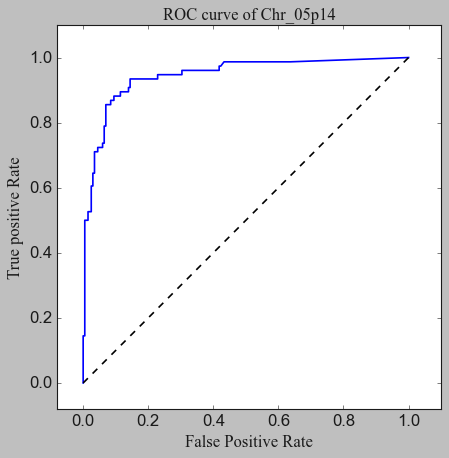

In [68]:
fig = plt.figure()
plt.style.use('classic')

ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='blue', linewidth=1.5)

plt.plot(x, y, '--', color='black', linewidth=1.5)

plt.title('ROC curve of Chr_05p14', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=15, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=15, fontname = 'Times New Roman')

ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)

plt.xticks(fontsize=15, fontname = 'Arial')
plt.yticks(fontsize=15, fontname = 'Arial')

plt.savefig('ROC_Curve_Combination.png', dpi=600)
plt.show()

#### 3.10.4.1 AUC Value

In [58]:
auc_value = auc(fpr, tpr)

In [59]:
print('AUC is ', auc_value)

AUC is  0.9446517412935324


# Results

In [60]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.910


In [61]:
print(performanceReport)

                    precision    recall  f1-score   support

            chr_05       0.94      0.93      0.94       201
chr_5_p14_deletion       0.82      0.86      0.84        76

         micro avg       0.91      0.91      0.91       277
         macro avg       0.88      0.89      0.89       277
      weighted avg       0.91      0.91      0.91       277



In [62]:
type(performanceReport)

str

In [63]:
print('AUC is ', auc_value)

AUC is  0.9446517412935324


## Export to a text file

In [64]:
file_report = open('ResultsCombination.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.write('Recall of Confusion Matrix: \n%s.\n\n' % confusion_r)
file_report.write('Precision of Confusion Matrix: \n%s.\n\n' % confusion_p)
file_report.close()